In [1]:
import os
import sqlite3

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

os.environ['LOKY_MAX_CPU_COUNT'] = '6'
%matplotlib inline

In [2]:
with sqlite3.connect('../datasets/developers_dataset.db') as dev_conn:
    dev_frame = pd.read_sql_query('SELECT * FROM developers', dev_conn)
    
# Convert RequiredSkills to set
def string_to_set(item_set):
     return set(item_set.split(', '))
dev_frame['Skills'] = dev_frame['Skills'].apply(string_to_set)

dev_frame

,name,surname,location,Skills,bio,email,password,Languages,Lat,Lon
0,Kenneth,Turner,"Manchester, United Kingdom","{84, 26, 74, 44, 99, 19, 85, 36, 0, 1, 41, 100...",This is an automatically generated profile for...,kenneth.turner@gmail.com,KennethTurner123_,inglese,53.480759,-2.242631
1,Henry,Sharpe,"Westminster, United Kingdom","{30, 76, 50, 75, 104, 20, 52, 19, 2, 59, 93, 5...",This is an automatically generated profile for...,henry.sharpe@outlook.com,HenrySharpe123_,"spagnolo, inglese",51.497495,-0.135658
2,Roger,Richardson,"Manchester, United Kingdom","{32, 44, 99, 19, 77, 41, 86, 0, 6, 1, 42, 9, 1...",This is an automatically generated profile for...,roger.richardson@gmail.com,RogerRichardson123_,inglese,53.480759,-2.242631
3,Nydia,Becerra,"Alicante, Spain","{76, 97, 5, 75, 64, 20, 2, 59, 58, 73, 100, 26...",This is an automatically generated profile for...,nydia.becerra@gmail.com,NydiaBecerra123_,spagnolo,38.345996,-0.490685
4,Fabrizia,Collina,"Poggio Bustone, Italy","{19, 0, 1, 82, 8, 84, 99, 39, 6, 83, 43, 54, 2...",This is an automatically generated profile for...,fabrizia.collina@gmail.com,FabriziaCollina123_,"inglese, italiano",42.508300,12.891756
...,...,...,...,...,...,...,...,...,...,...
504,Guy,Russell,"Leeds, United Kingdom","{43, 75, 74, 44, 99, 2, 19, 85, 0, 37, 6, 1, 4...",This is an automatically generated profile for...,guy.russell@outlook.com,GuyRussell123_,"spagnolo, inglese, francese, italiano",53.800755,-1.549077
505,Constance,Merle,"Toulouse, France","{10, 84, 75, 38, 74, 99, 2, 44, 19, 85, 0, 1, ...",This is an automatically generated profile for...,constance.merle@gmail.com,ConstanceMerle123_,"inglese, francese",43.604652,1.444209
506,Salomé,Marti,"León, Spain","{30, 76, 50, 104, 64, 75, 70, 20, 99, 2, 19, 5...",This is an automatically generated profile for...,salomé.marti@yahoo.com,SaloméMarti123_,spagnolo,42.598361,-5.571878
507,Leone,Camiscione,"San Cataldo, Italy","{19, 101, 0, 1, 18, 78, 8, 84, 70, 99, 77, 9, ...",This is an automatically generated profile for...,leone.camiscione@gmail.com,LeoneCamiscione123_,italiano,37.483155,13.988098


## Distance Matrix

In [3]:
from commons import (
    get_distance_matrix,
)

distance_matrix = get_distance_matrix(dev_frame, 'Skills')
distance_matrix

,0,1,2,3,4,5,6,7,8,9,...,499,500,501,502,503,504,505,506,507,508
0,0.000000,0.884615,0.695652,0.920000,0.680000,0.727273,0.840000,0.681818,0.782609,0.925926,...,0.636364,0.500000,0.708333,0.652174,0.600000,0.636364,0.476190,0.814815,0.583333,0.884615
1,0.884615,0.000000,0.931034,0.666667,0.903226,0.884615,0.846154,0.888889,0.681818,0.571429,...,0.851852,0.833333,0.857143,0.857143,0.791667,0.851852,0.821429,0.263158,0.833333,0.695652
2,0.695652,0.931034,0.000000,1.000000,0.703704,0.846154,0.807692,0.652174,0.846154,0.966667,...,0.666667,0.739130,0.565217,0.730769,0.695652,0.666667,0.740741,0.866667,0.434783,0.892857
3,0.920000,0.666667,1.000000,0.000000,0.933333,0.961538,0.833333,0.923077,0.826087,0.526316,...,0.964286,0.916667,0.888889,0.965517,0.920000,0.925926,0.892857,0.652174,0.935484,0.444444
4,0.680000,0.903226,0.703704,0.933333,0.000000,0.777778,0.740741,0.692308,0.777778,0.937500,...,0.541667,0.769231,0.666667,0.800000,0.730769,0.703704,0.724138,0.843750,0.700000,0.903226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,0.636364,0.851852,0.666667,0.925926,0.703704,0.800000,0.851852,0.807692,0.846154,0.892857,...,0.720000,0.791667,0.730769,0.625000,0.800000,0.000000,0.583333,0.785714,0.714286,0.892857
505,0.476190,0.821429,0.740741,0.892857,0.724138,0.769231,0.862069,0.730769,0.720000,0.862069,...,0.740741,0.652174,0.703704,0.750000,0.720000,0.583333,0.000000,0.758621,0.642857,0.862069
506,0.814815,0.263158,0.866667,0.652174,0.843750,0.896552,0.862069,0.900000,0.720000,0.565217,...,0.785714,0.760000,0.793103,0.793103,0.720000,0.785714,0.758621,0.000000,0.733333,0.680000
507,0.583333,0.833333,0.434783,0.935484,0.700000,0.827586,0.793103,0.653846,0.740741,0.870968,...,0.615385,0.680000,0.576923,0.724138,0.692308,0.714286,0.642857,0.733333,0.000000,0.870968


## Clustering

Avendo già sperimentato nel contesto delle offerte con il clustering sulla stessa tipologia di feature, questa volta abbiamo una conoscenza del problema più approfondita, non per questo sono assicurati risultati ugualmente validi, nonostante ciò il processo individuato è valido e il clustering degli sviluppatori sarà probabilmente implementato in modo simile.

In [4]:
from sklearn.cluster import Birch
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

# --- Tools
def birch_silhouette_scorer(model, data):
    tmp_labels = model.fit_predict(data)
    score = silhouette_score(data, tmp_labels)
    return score

param_grid = {
    'n_clusters': [3, 4, 5, 6],
    'threshold': [0.5, 0.7, 0.8],
    'branching_factor': [50, 100]
}

# --- Feature Engineering
_pca = PCA(2)
X_train, X_test = train_test_split(distance_matrix, test_size=0.2, random_state=42)
_train_data = _pca.fit_transform(X_train)
_test_data = _pca.fit_transform(X_test)
print(f'Train Size: {len(_train_data)}; Test Size: {len(_test_data)}')

# --- Find best Parameters
gsearch_pca = GridSearchCV(Birch(), param_grid, cv=5, scoring=birch_silhouette_scorer, n_jobs=-1)
gsearch_pca.fit(_train_data)

# --- Model
brc_test = Birch(
    n_clusters=gsearch_pca.best_params_['n_clusters'], 
    threshold=gsearch_pca.best_params_['threshold'], 
    branching_factor=gsearch_pca.best_params_['branching_factor']
)

brc_test.fit(_train_data)
test_labels = brc_test.predict(_test_data)
test_score = silhouette_score(_test_data, test_labels)
print(f"Test Silhouette Score: {test_score:.2f}")

Train Size: 407; Test Size: 102
Test Silhouette Score: 0.58


**Risultati**

Con la procedura identificata durante il clustering delle offerte abbiamo ottenuto dei risultati anche migliori del clustering delle offerte, quindi l'approccio individuato è valido anche per diversi dataset, se consideriamo la stessa feature Skill.

In [5]:
_data = _pca.fit_transform(distance_matrix)

brc = Birch(
    n_clusters=gsearch_pca.best_params_['n_clusters'], 
    threshold=gsearch_pca.best_params_['threshold'], 
    branching_factor=gsearch_pca.best_params_['branching_factor']
)
brc.fit(_data)
labels = brc.labels_
dev_frame['Group'] = labels

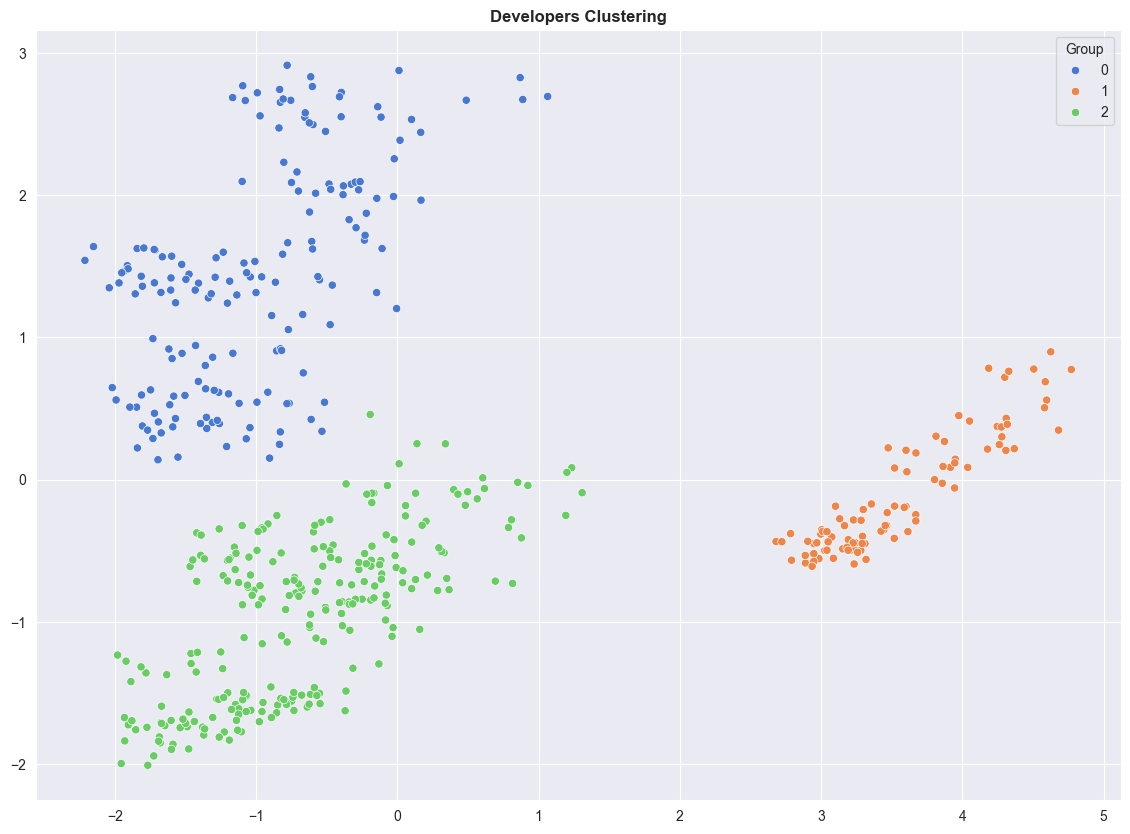

In [6]:
from sklearn.decomposition import PCA


pca = PCA(2)
group_labels = dev_frame['Group']
reduced_data = pca.fit_transform(distance_matrix)

plt.figure(figsize=(14, 10))
sns.scatterplot(x=reduced_data[:,0], y=reduced_data[:,1], hue=group_labels, palette='muted')
plt.title('Developers Clustering', fontweight='bold')

plt.show()